# Clase 04 - Integración Gaussiana

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-poster')

Usaremos el método de integración de Gauss-Legendre para calcular las siguientes integrales
$$ I_1 = \int_{-1}^{1} (1-x^2)^{3/2}dx=\frac{3\pi}{8} $$

$$ I_2 = \int_{0}^{\pi} \left(\frac{\sin x}{x} \right)^2 dx=Si(2\pi)=1.41815 $$

donde ${\rm Si}(x)=\int_0^x \frac{\sin t}{t}dt$ es la integral Sine.

In [3]:
import scipy
from scipy.special import*

In [4]:
def f1(x):
    return (np.power((1 + x)*(1 - x),1.5))

In [5]:
def f2(x):
    return ((np.sin(x)/x)**2)

In [6]:
I1 = 3*np.pi/8

In [7]:
(I2,aux) = sici(2*np.pi) # I2 = Si(2*pi)

In [8]:
print (I2)

1.4181515761326284


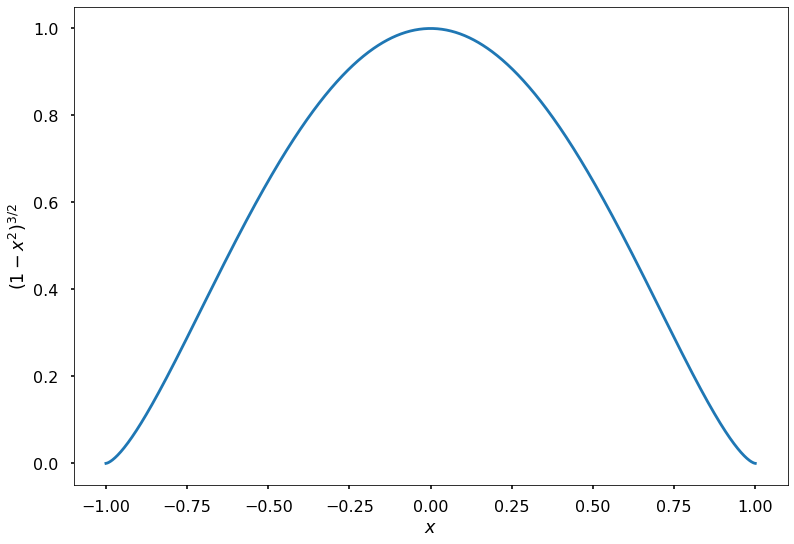

In [9]:
x1 = np.linspace(-1,1,1000)
plt.plot(x1,f1(x1));
plt.xlabel(r'$x$')
plt.ylabel(r'$(1-x^2)^{3/2}$');

/Users/ameza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


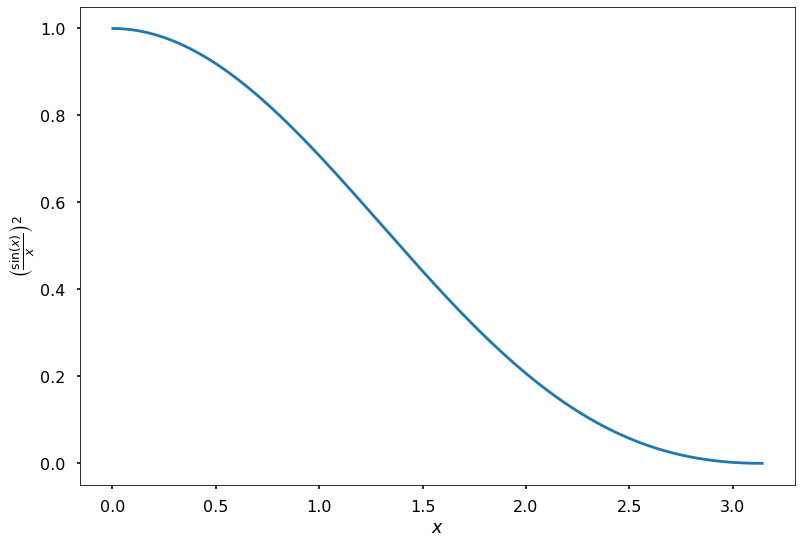

In [10]:
x2 = np.linspace(0,np.pi,1000)
plt.plot(x2,f2(x2));
plt.xlabel(r'$x$')
plt.ylabel(r'$\left(\frac{\sin(x)}{x}\right)^2$');

Usando la cuadratura de Gauss-Legendre tenemos que
$$ 
I = \frac{b-a}{2}\sum_{i=0}^{n} A_i f(x_i)
$$
donde $x_i$ son los ceros del polinomio de legendre $P_n(x)$ y los coeficientes $A_i$ están dados por
$$
A_i = \int_{-1}^1 \ell_i(x) dx = \frac{2}{(1-x_i^2)[P'_{n+1}(x_i)]^2}
$$
donde las funciones cardinales $\ell_i(x)$ pasan por los nodos $x_i$.

In [11]:
def gauss(f,a,b,x,A):
    c1 = 0.5*(b + a)
    c2 = 0.5*(b - a)
    sum = 0.0
    for i in range(0,len(x)):
        xi = c1 + c2*x[i]  # Cambio de variable para mapear el intervalo (a,b)-->(-1,1)
        sum = sum + A[i]*f(xi)
    return (c2*sum)

In [12]:
# número de nodos (grado del polinomio)
n = 10 

# Función de numpy que calcula los ceros del polinomio de grado n y los coeficientes A_i asociados
x,A = np.polynomial.legendre.leggauss(n) 

In [13]:
print (x)

[-0.97390653 -0.86506337 -0.67940957 -0.43339539 -0.14887434  0.14887434
  0.43339539  0.67940957  0.86506337  0.97390653]


In [14]:
print (A)

[0.06667134 0.14945135 0.21908636 0.26926672 0.29552422 0.29552422
 0.26926672 0.21908636 0.14945135 0.06667134]


Valor de la integral $I_1$

In [15]:
print ('valor integral =',gauss(f1,-1,1,x,A))
print ('error absoluto =',I1-gauss(f1,-1,1,x,A))

valor integral = 1.1780756223261772
error absoluto = 2.162276999517765e-05


Valor de la integral $I_2$

In [16]:
print ('valor integral =',gauss(f2,0,np.pi,x,A))
print ('error absoluto =',I2-gauss(f2,0,np.pi,x,A))

valor integral = 1.4181515761326282
error absoluto = 2.220446049250313e-16


Grafiquemos el error relativo de cada una de las integrales

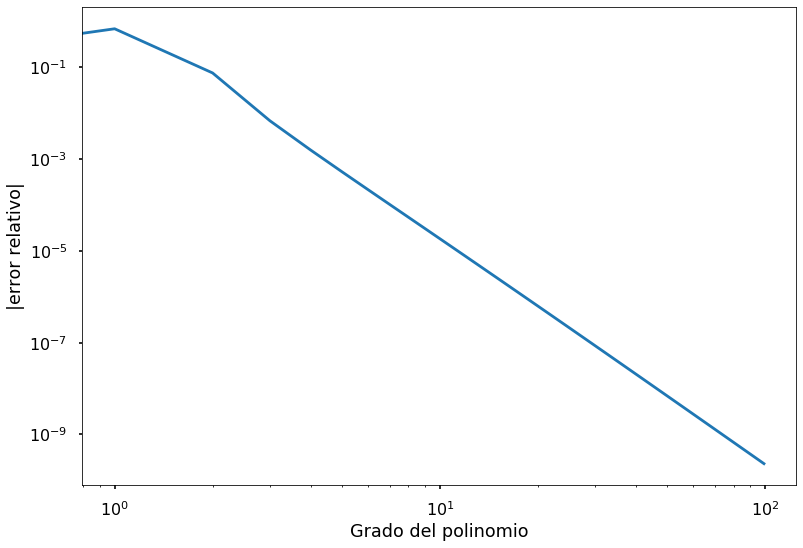

In [17]:
iter = 100
error = np.zeros(iter)
for n in range(1,iter):
    x,A = np.polynomial.legendre.leggauss(n)
    error[n] = (I1-gauss(f1,-1,1,x,A))/I1
    
plt.loglog(abs(error))
plt.xlabel('Grado del polinomio')
plt.ylabel('|error relativo|');

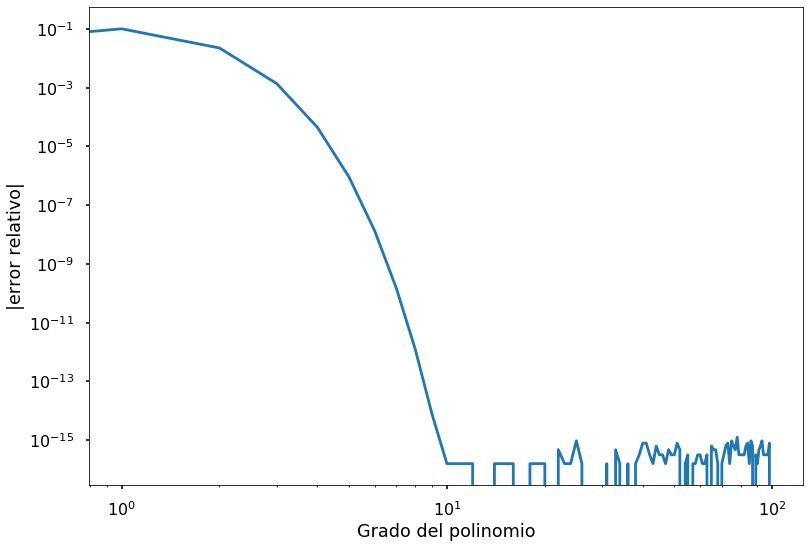

In [18]:
iter = 100
error = np.zeros(iter)
for n in range(1,iter):
    x,A = np.polynomial.legendre.leggauss(n)
    error[n] = (I2-gauss(f2,0,np.pi,x,A))/I2
    
plt.loglog(abs(error))
plt.xlabel('Grado del polinomio')
plt.ylabel('|error relativo|');